Привет, Людмила!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту.

### Откроем файл с данными и изучим общую информацию

In [26]:
import pandas as pd
import matplotlib.pyplot as plt #импортируем библиотеки

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #прочитаем файл с данными
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Импорт библиотек старайся делать в отдельной ячейке кода от основного

#### Посмотрим информацию о нашем датафрейме с помощью info():

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, мы видим, что у некоторых столбцов нужно изменить тип данных, например у first_day_exposition - с типа object на datetime, is_apartment - заменить на bool. Еще мы видим, что название столбца cityCenters_nearest нужно привести к нижнему регистру. И еще в датасете много пропусков.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о данных получена

#### Посмотрим информацию о датафрейме c  помощью describe():

In [28]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим некоторые ошибки в данных, этажи записаны не целыми числами, минимальная высота потолка 1 метр, а максимальная - 100 метров, выглядит явно нереалистично, скорее всего это ошибка при заполнении, количество балконов - дробные числа и др.

#### Посмотрим первые и последние строки датафрейма:

In [29]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [30]:
df.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


С самого начала и до конца очень много пропусков, а также есть ошибки в формате данных, например, first_day_exposition должен быть не типа object, а datetime.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первично посмотрели на данные. Ошибки в данных точно есть и надо будет решить что с ними сделать далее

#### Посмотрим информацию о дубликатах и пропусках:

In [31]:
display('Количество пропусков:', df.isna().sum())

'Количество пропусков:'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [32]:
display('Количество явных дубликатов:', df.duplicated().sum())

'Количество явных дубликатов:'

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков используй https://russianblogs.com/article/5001266235/

Итак, явных дубликатов нет, а пропусков очень много, всего в 14 столбцах есть пропуски, причем в некоторых столбцах их процент составляет значительную часть, например, в данных, является ли вариант для проживания апартаментами, ближайшие парки, пруды, количество балконов, и другие. Это связано скорее всего с тем, что при заполнении полей это были не обязательными для заполнения либо автоматически не заполнились.

### Выполним предобработку данных

#### Переименуем столбец, чтобы привести название к нижнему регистру:

In [33]:
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace = True)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


#### Исправим типы данных у некоторых столбцов:

In [34]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d') #исходные данные округлены до дней, поэтому сохраним в датасете дни
display(df['first_day_exposition'].head(3))
df.head(3)

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ты используешь достаточно удобный метод перевода в формат даты

In [35]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype(bool)
display(df['is_apartment'].head(3))
df.head(3)

0    False
1    False
2    False
Name: is_apartment, dtype: bool

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [36]:
df['total_images'].astype('int') #количество фото это целое число
display(df['total_images'].head(3))
df.head(3)

0    20
1     7
2    10
Name: total_images, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Типы данных исправили у трех столбцов.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут тобой использован оптимальный метод проработки.

#### Ищем неявные дубликаты и заполняем пропуски:

In [37]:
#посмотрим на названия населенного пункта, тут очень много повторений, неявных дубликатов, из-за разного написания слова поселок, нужно это исправить перед заполнением пропусков

display('Количество уникальных значений населенных пунктов:', df.locality_name.nunique())

'Количество уникальных значений населенных пунктов:'

364

In [38]:
df.locality_name = df.locality_name.str.replace('ё', 'е')
df.locality_name = df.locality_name.str.replace('поселок городского типа', 'поселок')
df.locality_name = df.locality_name.str.replace('городской поселок', 'поселок')
df.locality_name = df.locality_name.str.replace('коттеджный поселок', 'поселок')
df.locality_name.unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А здесь правильно будет вывести количество оставшихся уникальных значений после проработки.

In [39]:
# посмотрим количество оставшихся уникальных значений:

display('Количество уникальных значений населенных пунктов:', df.locality_name.nunique())

'Количество уникальных значений населенных пунктов:'

321

In [40]:
#посмотрим пропуски по высоте потолков
display('Количество пропусков столбце с высотой потолков:', df.ceiling_height.isna().sum())
display(df['ceiling_height'].describe()) #посмотрим общую информацйию по этому столбцу

'Количество пропусков столбце с высотой потолков:'

9195

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [41]:
#поработаем со столбцом ceiling_height - для начала, все значения NaN заменим на медиану:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Соглашусь. Оптимально пропуски никак не заменить и лучше всего заменить на медиану, так как высота потолков достаточно стандартизированное значение

In [42]:
#посмотрим, сколько у нас аномальных значений, требующих замены, например, признаем аномальными потолки выше 3.5 метров
display('Количество квартир с потолками выше 3.5 метров:', len(df[df['ceiling_height'] > 3.5].sort_values('ceiling_height')))

'Количество квартир с потолками выше 3.5 метров:'

304

In [43]:
#Здесь явно были допущены какие-то систематические ошибки, посмотрим на 30 самых больших этих значений:
df['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [44]:
#можно предположить, что для значений от 24 и больше неверно поставили точку в данных, имея в виду 2.4 метра, исправим:
df.loc[df['ceiling_height'] >=24.0, 'ceiling_height'] = df['ceiling_height']/10
df['ceiling_height'].sort_values(ascending=False).head(10)

20507    22.6
17496    20.0
15061    14.0
22309    10.3
22869    10.0
5863      8.3
15743     8.0
3474      8.0
17442     8.0
20264     6.0
Name: ceiling_height, dtype: float64

In [45]:
#для потолков выше 3,5 метров, признавая их аномальными значениями, заменим на медиану:
df.loc[df['ceiling_height'] >=3.5, 'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'].sort_values(ascending=False).head(10) #проверим замену

14946    3.49
22843    3.49
22063    3.48
17417    3.47
9096     3.47
5195     3.47
18000    3.47
13525    3.47
14696    3.47
20183    3.46
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Устранили выбросы. Супер.

In [46]:
display('Количество пропусков:', df['ceiling_height'].isna().sum()) #проверка количества пропусков
df.head(5)

'Количество пропусков:'

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [47]:
#посмотрим количество пропусков
display('Количество пропусков:', df.isna().sum())

'Количество пропусков:'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [48]:
#пропуски NaN в столбце floors_total заменим на медианные, это лучшее решение для количественных переменных
#df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
#df['floors_total'].sort_values(ascending=False).tail(5)

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А тут согласиться не могу. У тебя при таком мептоде замены будут встречаться значения, когда текущий этаж будет выше замененного. Тут лучше всего или оставить пропуски как есть, или заменить его на текущее значение этажа. 

Пропуски NaN в столбце floors_total заменять не будем, оставим как есть, иначе это может привести к искажению в дальнейшем анализе, статистики не могут предугадать, на каком этаже был объект.

In [49]:
display('Количество пропусков:', df['floors_total'].isna().sum()) #проверка количества пропусков

'Количество пропусков:'

86

In [50]:
#пропуски в living_area - жилая площадь, то есть общая площадь минус все места общего пользования в квартире
df['living_area_ratio'] = df['living_area']/df['total_area']
display((df['living_area_ratio']).median())

0.5678598992678503

In [51]:
#пропуски в столбце можно заменить на 56,6 процентов от общей площади в той же строке
def living_a(row):
    liv = row['living_area']
    total = row['total_area']
    return row['total_area'] * df['living_area_ratio'].median()
df['living_area'] = df.apply(living_a, axis=1)
display('Количество пропусков living_area:', df['living_area'].isna().sum())
display(df.head(5))

'Количество пропусков living_area:'

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,61.328869,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,22.941540,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,31.800154,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.289724,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,56.785990,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно точечный метод замены получился

In [52]:
#аналогично сделаем с пропусками в столбце kitchen_area:
df['kitchen_area_ratio'] = df['kitchen_area']/df['total_area']
display(df['kitchen_area_ratio'].median())

0.1724137931034483

In [53]:
#заменяем пропуски:
def kit_a(row):
    kit = row['kitchen_area']
    total = row['total_area']
    return row['total_area'] * df['kitchen_area_ratio'].median()
df['kitchen_area'] = df.apply(kit_a, axis=1)
display('Количество пропусков kitchen_area:', df['kitchen_area'].isna().sum())

'Количество пропусков kitchen_area:'

0

In [54]:
#пропуски в столбце balcony заменим на 0, потому что, не указав, собственники скорее всего имели в виду, что их нет
df['balcony'] = df['balcony'].fillna(0.0)
display('Количество пропусков balcony:', df['balcony'].isna().sum())

'Количество пропусков balcony:'

0

In [55]:
#пропуски в столбце locality_name, а их мало, всего 49, заменим на unknown:
df['locality_name'] = df['locality_name'].fillna('unknown')
display('Количество пропусков locality_name:', df['locality_name'].isna().sum())

'Количество пропусков locality_name:'

0

In [56]:
#для двух столбцов parks_around3000 и ponds_around3000 пропуски, скорее всего, означают, что нет парков и водоемов в радиусе 3 км, поэтому значения можно заменить на 0 в обоих случаях:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
display('Количество пропусков parks_around3000:', df['parks_around3000'].isna().sum())
display('Количество пропусков ponds_around3000:', df['ponds_around3000'].isna().sum())

'Количество пропусков parks_around3000:'

0

'Количество пропусков ponds_around3000:'

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32

In [57]:
#посмотрим, какие столбцы остались с пропусками и проанализируем возможные причины этих пропусков в данных:
display('Количество пропусков:', df.isna().sum())

'Количество пропусков:'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
living_area_ratio        1903
kitchen_area_ratio       2278
dtype: int64

Пропуски в столбце airports_nearest означают, скорее всего, что рядом аэропорта нет, либо эти данные просто не заполнялись, оставим без изменений, аналогично с city_centers_nearest и parks_nearest и ponds_nearest, не все собственники заполняют дополнительную информацию, а автоматически, возможно, по заданным параметрам определить не удалось, возможно, есть вариант уточнить у коллег, собиравших данные. Пропуски в данных в столбце days_exposition, то есть сколько дней было размещено объявление, указывают, скорее всего на то, что объявление еще в продаже, то есть срок окончания публикации неизвестен, поэтому тоже вносить изменения в столбец пока не будем.

#### Вывод:
    Таким образом, мы завершили предобработку данных, а именно:
    1. Загрузили наш датасет и посмотрели общую информацию об имеющихся данных. У нас 22 столбца и 23699 строк.
    2. Исправили название столбца в соответствии с правилами оформления
    3. Изменили типы данных для столбцов, которые этого требовали
    5. Устранили неявные дубликаты, а также проверили, что отсутствуют явные
    4. Заполнили пропуски, а также посмотрели, по каким причинам в некоторых столбцах пропуски пока не заменены на значения. Также устранили аномалии, где они были.
    И теперь данные готовы к дальнейшему анализу, они пригодны и информативны.
    
    Есть несколько причин, по которым могут быть ошибки в данных, в данном случае, основные - человеческий фактор и технические ошибки, всегда возможны программные сбои при некоторой автоматизации сбора данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С предобработкой получилось хорошо. Осталось пару замечаний подправить.

### Добавим в таблицу новые столбцы

#### Добавим столбец с ценой квадратного метра

In [58]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['price_square_meter'].unique

<bound method Series.unique of 0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_square_meter, Length: 23699, dtype: float64>

#### Добавим столбец день недели публикации

In [59]:
#1 - понедельник, 2 - вторник и т.д.
df['day_publication'] = df['first_day_exposition'].dt.weekday
df['day_publication'].unique

<bound method Series.unique of 0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_publication, Length: 23699, dtype: int64>

#### Добавим столбец месяц публикации

In [60]:
#1 - январь, 2 - февраль и т.д.
df['month_publication'] = df['first_day_exposition'].dt.month
df['month_publication'].unique

<bound method Series.unique of 0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publication, Length: 23699, dtype: int64>

#### Добавим столбец год публикации

In [61]:
#с 2014 по 2019
df['year_publication'] = df['first_day_exposition'].dt.year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,day_publication,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,61.328869,8,False,False,False,18.620690,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,22.941540,1,False,False,False,6.965517,2.0,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,31.800154,4,False,False,False,9.655172,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015


#### Добавим столбец этаж квартиры - первый, последний, другой

In [62]:
#напишем функцию:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor, axis=1)
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,day_publication,month_publication,year_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,61.328869,8,False,False,False,18.620690,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,22.941540,1,False,False,False,6.965517,2.0,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,31.800154,4,False,False,False,9.655172,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015,другой


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простая, удобная и понятная функция получилась

#### Добавим столбец расстояние до центра города, округлив до целого и переведя в км

In [63]:
df['distance_city_center'] = (df['city_centers_nearest'] / 1000).round(0)
df['distance_city_center'].unique
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_square_meter,day_publication,month_publication,year_publication,floor_type,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,61.328869,8,False,False,False,18.620690,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,22.941540,1,False,False,False,6.965517,2.0,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,31.800154,4,False,False,False,9.655172,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.289724,9,False,False,False,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,56.785990,13,False,False,False,17.241379,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000,100000.00,1,6,2018,другой,8.0


#### Вывод

Таким образом, необходимые столбцы были добавлены в общую таблицу.

### Проведем исследовательский анализ данных

#### Изучим зависимость количества квартир в продаже от отдельных параметров:

##### Общая площадь

In [64]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

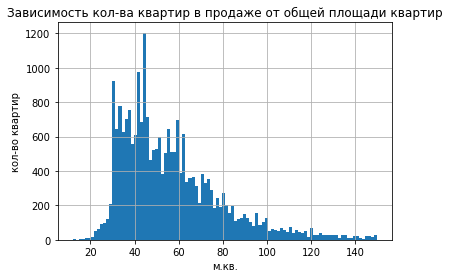

In [65]:
#построим гистограмму, минимальным значением возьмем 12 квадратных метров, максимальным 150 кв м, так как площади больше кажутся выбросами, ошибками

plt.hist(df['total_area'], bins=100, range=(12, 150))
plt.title('Зависимость кол-ва квартир в продаже от общей площади квартир')
plt.xlabel('м.кв.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

На графике мы видим, что макисмальное количество квартир продается с площадью около 42 квадратных метров, это классический вариант двушки для малогабаритных квартир, и евродвушки в домах современной планирровки. На рынке в основном в продаже квартиры площадью от 30 до 70 квадратных метров.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По графику отчетливо видно, что большая часть значенйи сосредоточено от 30 до 70 метров

##### Жилая площадь

In [66]:
df['living_area'].describe()

count    23699.000000
mean        34.269579
std         20.246524
min          6.814319
25%         22.714396
50%         29.528715
75%         39.693407
max        511.073909
Name: living_area, dtype: float64

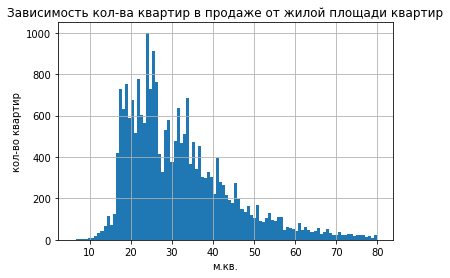

In [67]:
#построим гистограмму с минимальным значением 6 кв.м. и максимальным 80 кв.м.

plt.hist(df['living_area'], bins=100, range=(6, 80))
plt.title('Зависимость кол-ва квартир в продаже от жилой площади квартир')
plt.xlabel('м.кв.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

По графику видно, что большинство квартир в продаже с жилой площадью от 18 до 38 кв.м.

#####  Площадь кухни

In [68]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.404940
std          6.147256
min          2.068966
25%          6.896552
50%          8.965517
75%         12.051724
max        155.172414
Name: kitchen_area, dtype: float64

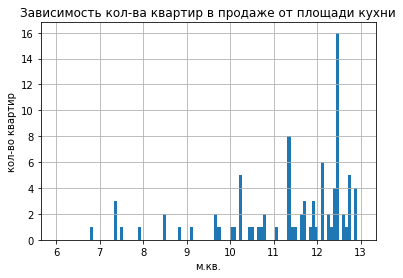

In [69]:
#построим гистограмму с минимальным значением 6 кв.м. и максимальным 13 кв.м., в этот промежуток попадает большинство квартир

plt.hist(df['living_area'], bins=100, range=(6, 13))
plt.title('Зависимость кол-ва квартир в продаже от площади кухни')
plt.xlabel('м.кв.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Очевидно, что самые популярные размеры кухни в квартирах - около 10-12 кв.м., что является стандартом для большинства типов домов.

#####  Анализ цены

In [70]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

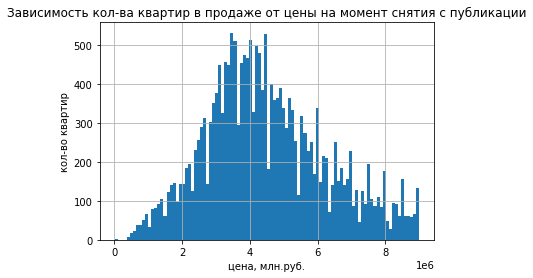

In [71]:
#построим гистограмму:

plt.hist(df['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость кол-ва квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('цена, млн.руб.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Итак, по графику видно, что большмнство квартир в продаже стоили на момент снятия объявлений от 3 до 5 млн.руб.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По выводу здорово вышло

#####  Количество комнат

In [72]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

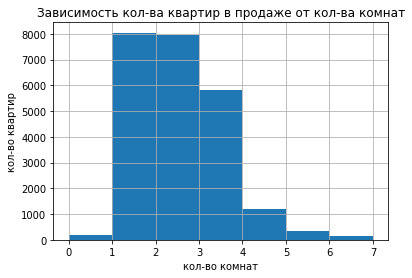

In [73]:
#построим гистограмму, максимальное значение возьмем 7, более него уже данные кажутся ошибочными:
plt.hist(df['rooms'], bins=7, range=(0,7))
plt.title('Зависимость кол-ва квартир в продаже от кол-ва комнат')
plt.xlabel('кол-во комнат')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Видим, что в продаже больше всего 1-комнатных квартир, затем идут 2-комнатные, и так далее, с увеличением количества комнат, общее число объектов в продаже снижается.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Распределение по комнатам логически соотносится с распределением по площади

#####  Высота потолков

In [74]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.677821
std          0.165304
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

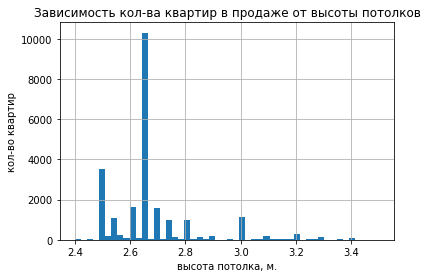

In [75]:
#построим гистограмму, минимальное значение возьмем 2.4, максимальное 3.5 метра:
plt.hist(df['ceiling_height'], bins=50, range=(2.4,3.5))
plt.title('Зависимость кол-ва квартир в продаже от высоты потолков')
plt.xlabel('высота потолка, м.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Как мы видим, самая часто встречающаяся высота порлотока 2.65 метра, но и с более приятной высотой пололков 2.8 и 3 метра тоже довольно много предложений.

#####  Тип этажа квартиры (первый, последний или другой)

In [76]:
df['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: floor_type, dtype: object

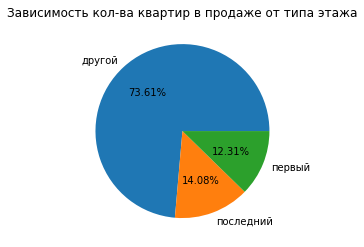

In [77]:
#построим круговую диаграмму по типу этажа:

floor_type = df['floor_type'].value_counts()
plt.pie(floor_type, labels=floor_type.index, autopct='%1.2f%%')
plt.title('Зависимость кол-ва квартир в продаже от типа этажа')

plt.show()

Очевидно, доля не первого и последнего этажа самая большая, что вполне логично для большого города с многоэтажными застройками.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Квартиры на первоми этаже пользуются наименьшим спросом

#####  Общее количество этажей в доме

In [78]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

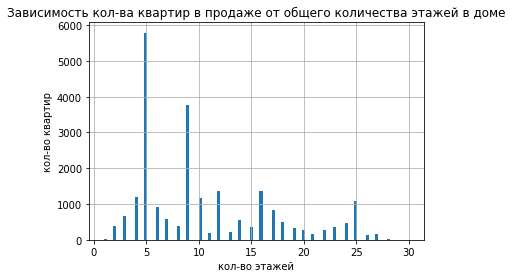

In [79]:
#построим гистограмму, минимальное значение 1, максимальное 30, так как более высокие жилые дома это уникальный случай, назовем аномальным:

plt.hist(df['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость кол-ва квартир в продаже от общего количества этажей в доме')
plt.xlabel('кол-во этажей')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

По графику очень хорошо заметно, что пятиэтажек все еще много в городе и предложений о продаже квартир в них имеет макимальное значение. На втором месте 9-этажные жилые дома, которых также строилось очень много.

#####  Расстояние до центра города (в метрах)

In [80]:
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

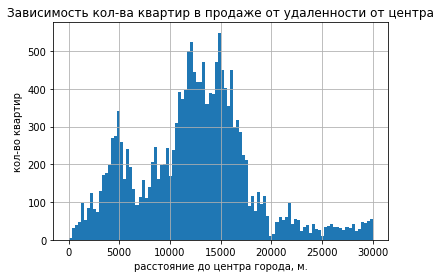

In [81]:
#построим гистограмму:

plt.hist(df['city_centers_nearest'], bins=100, range=(0,30000))
plt.title('Зависимость кол-ва квартир в продаже от удаленности от центра')
plt.xlabel('расстояние до центра города, м.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Очевидно, что в центре предложений очень мало, а вот в спальных районах, примерно в 12-15 км от центра больше всего объявлений о продаже, где застройка плотная и цена ниже.

#####  Расстояние до ближайшего парка (в метрах)

In [82]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

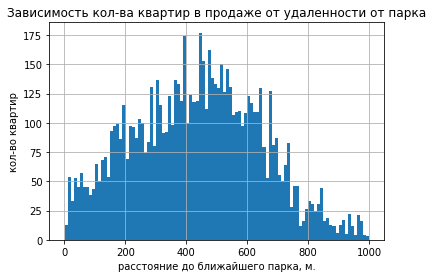

In [83]:
#построим гистограмму:

plt.hist(df['parks_nearest'], bins=100, range=(1,1000))
plt.title('Зависимость кол-ва квартир в продаже от удаленности от парка')
plt.xlabel('расстояние до ближайшего парка, м.')
plt.ylabel('кол-во квартир')
plt.grid()
plt.show()

Итак, по графику видим, что нет сильной зависимости от расстояния до ближайшего парка, но в среднем в 200-650 метрах парк есть у большинства объектов.

#### Вывод после построения графиков зависимости количества предложений от отдельных параметров:

Итак, были изучены и описаны следующие параметры, а также построены для наглядности их графики:
  - общая площадь, мы видим, что больше всего квартир продавалось площадью 42 кв.к., в целом же большинство объектов представлены в промежутке от 30 до 70 кв.м., что вполне логично, зная типовые застройки городов многоквартирными домами;
  - жилая площадь - и мы видим, что с большинство предложений с жилой площадью от 18 до 38 кв.м.;
  - площадь кухни, как и ожидалось, в стандартных квартирах 10-12 кв.м., но и 6-метровые кухни тоже частая ситуация, как видно по графику;
  - цена объекта в среднем укладывалась в интервал от 3 до 5 млн. руб., но наблюдаются отдельные всплески;
  - количество комнат - на пай-чарте видно, что на первом и последнем этажах (это самые неликвидные этажи, с наименьшей ценой) продается около четверти объектов, остальные же предложения на другом этаже, что объясняется многоэтажной застройкой городов;
  - высота потолков - как и ожидалось, стандартные потолки 2,65 метра самый частый вариант;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме - в пятиэтажках больше всего предложений, далее идут 9-этажные дома;
  - расстояние до центра города в метрах - больше всего объектов, конечнор же, в спальных районах, на удалении от центра примерно в 12-15 км., есть также на графике заментый всплеск на расстоянии 5 км от центра города;
  - расстояние до ближайшего парка - оно в среднем 200-700 метров, что отлично для города, поэтому на количество объектов не сильно влияет.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Эти выводы точно пригодятся при составлении итогового заключения

#### Изучим как быстро продавались квартиры, то есть сколько дней было размещено объявление:

In [84]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

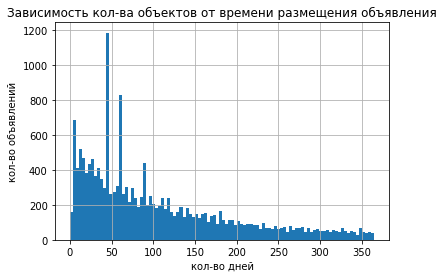

In [85]:
#построим гистограмму, взяв интервал до года, куда попали большинство предложений:

plt.hist(df['days_exposition'], bins=100, range=(0,365))
plt.title('Зависимость кол-ва объектов от времени размещения объявления')
plt.xlabel('кол-во дней')
plt.ylabel('кол-во объявлений')
plt.grid()
plt.show()

Итак, мы видим, что квартиру продают в среднем за 3 месяца. Для количественных переменных лучше всего подходит значение медианы для определения среднего значения, в то время как среднее значение для всего датасета составило 180 дней, то есть полгода, что, конечно же, объясняется аномальными значениями максимального срока размещения объявления. Видим на графике также очень большой всплеск продаж примерно в 7, 45 дней, и 90 дней, это скорее всего соответствует стандартному времени размещения объявлений на сервисе. Но все же быстрой продажей можно считать все продажи до 1,5 месяцев, ведь недвижимость это сложный объект. Все объявления из третьей квартили (более 232 дней) считаем медленной, или даже не состоявшейся продажей, возможно, объявление сняли так и не реализовав продажу.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово, что ты обнаружила выбивающиеся значения на графике. Они появились не просто так. В эти дни система убирает с показа бесплатные объявления

#### Определим факторы, которые больше всего влияют на общую(полную) стоимость объекта:

##### Зависимость цены от общей площади

'Коэффициент Пирсона равен'

0.6536750579657242

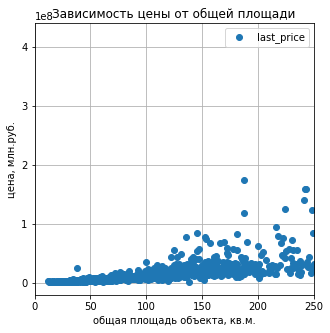

In [86]:
#сделаем сводную таблицу:

(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', xlim=(0,250), figsize=(5,5))
)
plt.title('Зависимость цены от общей площади')
plt.xlabel('общая площадь объекта, кв.м.')
plt.ylabel('цена, млн.руб.')
plt.show

display ("Коэффициент Пирсона равен", df['total_area'].corr(df['last_price']))

Коэффициент Пирсона равен 0,65, что указывает на прямую зависимость цены от общей площади с достаточно высокой корреляцией, на графике также видно это - с ростом площади цена повышается.

##### Зависимость цены от жилой площади

'Коэффициент Пирсона равен'

0.6536750579657239

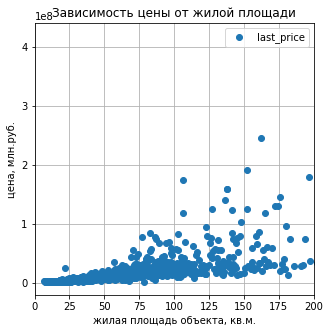

In [87]:
(
    df.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', xlim=(0,200), figsize=(5,5))
)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('жилая площадь объекта, кв.м.')
plt.ylabel('цена, млн.руб.')
plt.show

display ("Коэффициент Пирсона равен", df['living_area'].corr(df['last_price']))

Коэффициент Пирсона равен 0,65, что указывает на прямую зависимость цены от жилой площади с достаточно высокой корреляцией, на графике также видно это. Это объясняется аналогично, цена квадратного метра может плавно падать, но в целом большая жилая площадь имеет цену выше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Использован хороший способ для показа зависимости на графике

##### Зависимость цены от площади кухни

'Коэффициент Пирсона равен'

0.6536750579657239

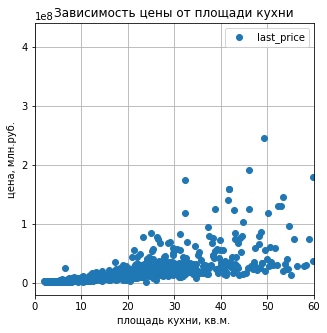

In [88]:
(
    df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', xlim=(0,60), figsize=(5,5))
)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь кухни, кв.м.')
plt.ylabel('цена, млн.руб.')
plt.show

display ("Коэффициент Пирсона равен",df['kitchen_area'].corr(df['last_price']))

Ситуация аналогичная, чем больше площадь кухни, чем выше цена.

##### Зависимость цены от количества комнат

'Коэффициент Пирсона равен'

0.3633428499648948

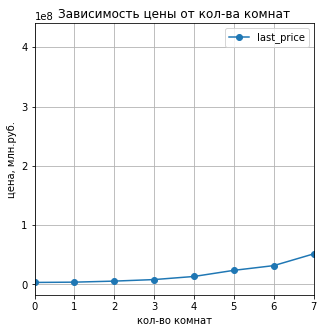

In [89]:
(
    df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,7), figsize=(5,5))
)
plt.title('Зависимость цены от кол-ва комнат')
plt.xlabel('кол-во комнат')
plt.ylabel('цена, млн.руб.')
plt.show

display ("Коэффициент Пирсона равен", df['rooms'].corr(df['last_price']))

Коэффициент Пирсона равен 0,36, что говорит о слабой зависимости, которая все же есть и положительная, то есть чем больше комнат, тем выше цена. Низкое значение коэффициента можно объяснить тем, что бывают ситуации, когда площадь большая, но число комнат маленькое, тогда и цена будет зависеть не от числа спален, а от жилой площади.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По выводу здорово

##### Зависимость цены от типа этажа

<function matplotlib.pyplot.show(close=None, block=None)>

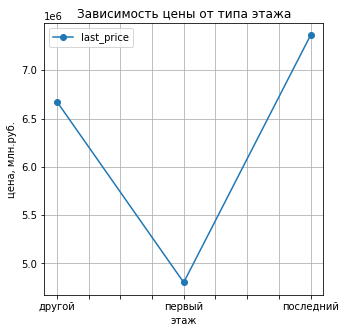

In [90]:
(
    df.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5,5))
)
plt.title('Зависимость цены от типа этажа')
plt.xlabel('этаж')
plt.ylabel('цена, млн.руб.')
plt.show


По графику очевидно, что на первом этаже самые дешевые квартиры, непопулярный тип этажа.

##### Зависимость цены от дня публикации

<function matplotlib.pyplot.show(close=None, block=None)>

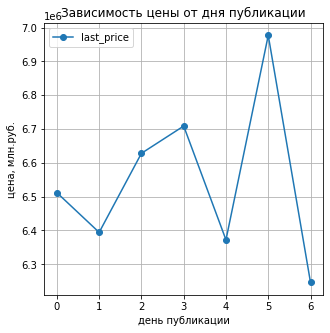

In [91]:
(
    df.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5,5))
)
plt.title('Зависимость цены от дня публикации')
plt.xlabel('день публикации')
plt.ylabel('цена, млн.руб.')
plt.show

Очевидно, зависимости от дня публикации нет, к середине и концу недели цены объявлений, в среднем, повыше, но цены часто меняют в процессе продажи.

##### Зависимость цены от месяца публикации

<function matplotlib.pyplot.show(close=None, block=None)>

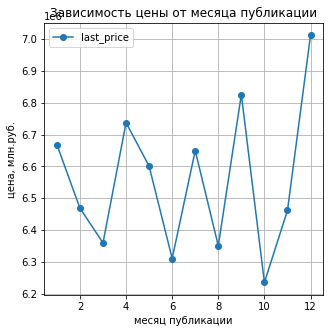

In [92]:
(
    df.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5,5))
)
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('месяц публикации')
plt.ylabel('цена, млн.руб.')
plt.show


И от месяца публикации цена не зависит, по графику видно, что в конце года объекты продавались дороже, это может быть связано с новогодними премиями, и, соответственно, повышению спроса.

##### Зависимость цены от года публикации

<function matplotlib.pyplot.show(close=None, block=None)>

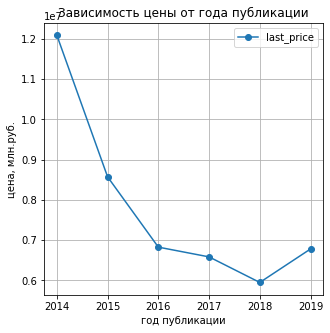

In [93]:
(
    df.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5,5))
)
plt.title('Зависимость цены от года публикации')
plt.xlabel('год публикации')
plt.ylabel('цена, млн.руб.')
plt.show

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Для дня, месяца и года нет смысла считать корреляцию. У этих показателей нет линейной связи. Вывод о зависимости стоит делать только по графику

По графику видим, что цены снижались в 2015-2018 годах, но линейной зависимости цены от года публикации нет.

#### Вывод о влиянии отдельных факторов на общую(полную) стоимость объекта:

Итак, проанализировав влияние отдельных факторов на общую стоимость объекта, можно сделать следующие выводы:

    - на цену объекта сильно влияет площадь(как общая, так и жилая и кухни), это вполне логично, ведь за квартиры большей площади как правило и суммы требуют больше, цена квадратного метра при этом может плавно снижаться, плюс другие факторы тоже оказывают влияние на стоимость
    - предложения на первом этаже дешевле, чем на других, так как для жизни это наименее привлекательный вариант
    - день, месяц, год размещения на цену не влияет.

#### Посчитаем среднюю цену 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений

In [171]:
#сделаем сводную таблицу для того, чтобы вычислить цену квадратного метра:

price_meter = df.pivot_table(index='locality_name',values='last_price', aggfunc=['count'])
price_meter.columns = ['count']
price_meter = price_meter.sort_values(by='count', ascending=False).head(10)
price_meter['price_square_meter'] = df.pivot_table(index='locality_name',values='price_square_meter').round(2)
price_meter.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
Санкт-Петербург,15721,114849.01
Пушкин,369,103125.82
деревня Кудрово,299,92473.55
поселок Парголово,327,90175.91
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Колпино,338,75424.58
Гатчина,307,68746.15
Всеволожск,398,68654.47


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 по городам получен

#### Вывод:
Конечно же, самая высокая цена квадратного метра в городе Санкт-Петербург, далее идет довольно большой и развитый город Пушкин, за ними следуют близлежащие поселки и деревни, которые, фактически, примыкают к городу. Последние два населенных пункта из топ-10 находятся на большем расстоянии от Санкт-Петербурга, но имеют хорошую инфраструктуру, поэтому и цену на жилье также довольно высокую.

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и посчитаем их среднюю стоимость на разном удалении от центра

In [174]:
df.query('locality_name == "Санкт-Петербург"')['distance_city_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

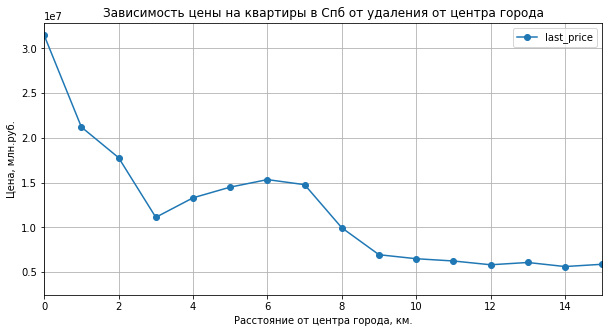

In [176]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены на квартиры в Спб от удаления от центра города')
plt.xlabel('Расстояние от центра города, км.')
plt.ylabel('Цена, млн.руб.')
plt.show()

In [179]:
#выведем таблицу по стоимости:

display('Средняя стоимость квартир в СПБ в зависимости от удаления от центра города')
df.query('locality_name == "Санкт-Петербург" and distance_city_center<10').pivot_table(values='last_price', index='distance_city_center')

'Средняя стоимость квартир в СПБ в зависимости от удаления от центра города'

,last_price
distance_city_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


#### Вывод:
Как и ожидалось, самые дорогие квартиры в самом центре города, с удалением от которого и цена снижается. После расстояния 9 км от центра зависимость не такая сильная, это, возможно, связано с тем, что на окраинах строят современные жилые комплексы, с хорошими условиями(паркинги, школы, магазины) и соответственно, высокими ценами.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
После 9 км цена перестат резко падать. Это говорит о том, что после этого значения заканчивается зона центра города

### Общий вывод

    Итак, была проделана работа по исследованию объявлений о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах. 
    Посмотрев общую информацию о нашем датасете, мы ознакомились с количеством и типом данных, далее исправили название столбца, чтобы оно соответствовало верным правилам написания.
    Затем была проведена предобработка данных. А именно, мы проверили, что явных дубликатов нет. Типы данных исправили у трех столбцов. Затем, устранили неявные дубликаты, аномалии, и заполнили пропуски. Пропусков в датасете было довольно много, в 14 столбцах из 22. Причины разные, и человеческий фактор(например, если нет балкона, то оставляли окошко незаполненным) и технические ошибки(например, автоматический сбор информации в некоторых столбцах не приводил к заполнению данных, ближайшие аэропорты, пруды, парки, в таком случае, разработчикам сбора данных следует настроить заполнение определенным значением, например, 'не найдено'). В любых случаях, рекомендую уточнять у коллег, каковы причины пропусков и есть ли вариант восстановить часть данных из других источников.
    Нам было необходимо добавить некоторые столбцы в таблицу, мы это и сделали, добавили цену 1 кв.м., день недели, месяц и год публикации объявления, тип этажа квартиры(первый, последний, другой), расстояние до центра города в км. 
    Затем был произведен исследовательский анализ данных. В итоге, мы можем сделать некоторые выводы:
    - макисмальное количество квартир продается с площадью около 42 квадратных метров, это классический вариант двушки для малогабаритных квартир, и евродвушки в домах современной планирровки. На рынке в основном в продаже квартиры площадью от 30 до 70 квадратных метров
    - что вполне логично, зная типовые застройки городов многоквартирными домами;
    - большинство предложений с жилой площадью от 18 до 38 кв.м.;
    - площадь кухни, как и ожидалось, в стандартных квартирах 10-12 кв.м., но и 6-метровые кухни тоже частая ситуация, как видно по графику;
    - цена объекта в большинстве случаев укладывалась в интервал от 3 до 5 млн. руб., но наблюдаются отдельные всплески;
    - на пай-чарте видно, что на первом и последнем этажах (это самые неликвидные этажи, с наименьшей ценой) продается около четверти объектов, остальные же предложения на другом этаже, что объясняется многоэтажной застройкой городов;
    - как и ожидалось, стандартные потолки 2,65 метра самый частый вариант, но и предложений с более комфортными для жизни 2,85 и 3 метра также имеются в больших количествах;
    - общее количество этажей в доме - в пятиэтажках больше всего предложений, далее идут 9-этажные дома;
    - расстояние до центра города в метрах - больше всего объектов, конечнор же, в спальных районах, на удалении от центра примерно в 12-15 км., есть также на графике заментый всплеск на расстоянии 5 км от центра города;
    - расстояние до ближайшего парка в среднем 200-700 метров, что отлично для города, поэтому на количество объектов не сильно влияет.
        Далее, проанализировав влияние отдельных факторов на общую стоимость объекта, можем сделать следующие выводы:
    - на цену объекта сильно влияет площадь(как общая, так и жилая и кухни), это вполне логично, ведь за квартиры большей площади как правило и суммы требуют больше, цена квадратного метра при этом может плавно снижаться, плюс другие факторы тоже оказывают влияние на стоимость;
    - предложения на первом этаже дешевле, чем на других, так как для жизни это наименее привлекательный вариант;
    - день, месяц, год размещения на цену не влияет, это объясняется тем, что в больших городах сильной сезонности в области недвижимости нет, всегда есть спрос и предложение, рынок не замирает.
    Далее мы изучили, сколько в среднем было размещено объявление на сайте. И видим, что квартиру продают в среднем за 3 месяца. Для количественных переменных лучше всего подходит значение медианы для определения среднего значения. Видим на графике также очень большой всплеск продаж примерно в 7, 45 дней, и 90 дней, это скорее всего соответствует стандартному времени размещения объявлений на сервисе. Но все же быстрой продажей можно считать все продажи до 1,5 месяцев, ведь недвижимость это сложный объект. Все объявления из третьей квартили (более 232 дней) считаем медленной, или даже не состоявшейся продажей, возможно, объявление сняли так и не реализовав продажу.
    Также мы изучили факторы, которые больше всего влияют на общую(полную) стоимость объекта. Пришли к следующим выводам:
    - на цену объекта сильно влияет площадь(как общая, так и жилая и кухни), это вполне логично, ведь за квартиры большей площади как правило и суммы требуют больше, цена квадратного метра при этом может плавно снижаться, плюс другие факторы тоже оказывают влияние на стоимость;
    - предложения на первом этаже дешевле, чем на других, так как для жизни это наименее привлекательный вариант;
    - день, месяц, год размещения на цену не влияет.
    Далее мы посчитали среднюю цену 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений из нашего датасета, включая Санкт-Петербург и близлежащие города. Ожидаемо, самая высокая цена квадратного метра в городе Санкт-Петербург, далее идет довольно большой и развитый город Пушкин, за ними следуют близлежащие поселки и деревни, которые, фактически, примыкают к городу или можно сказать, являются районами города Санкт-Петербург. Последние два населенных пункта из топ-10 находятся на большем расстоянии от Санкт-Петербурга, но имеют хорошую инфраструктуру, поэтому и цену на жилье имеют также довольно высокую.
    И, наконец, мы выделили квартиры в Санкт-Петербурге с помощью столбца locality_name и посчитали их среднюю стоимость на разном удалении от центра. И тут тоже очевидно, что самые дорогие квартиры в самом центре города, в больших городах с красивым историческим центром это логично. С удалением от центра и цена снижается. После расстояния 9 км от центра зависимость не такая сильная, это, возможно, связано с тем, что на окраинах строят современные жилые комплексы, с хорошими условиями(паркинги, школы, магазины) и соответственно, высокими ценами.
    
    

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал превосходным дополнением к твоему проекту. Ты отлично находишь инсайты в данных рынке Недвижимости. Теперь мы точно сможем составить антифрод-систему для сервиса Недвижимости

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобрался с предобработкой данных. Твои выводы вполне логичны и все на своих местах. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Переделать замену некоторых пропусков.
* Убрать подсчет корреляции для некоторых параметров.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

In [ ]:
Спасибо за комментарии, очень полезные замечания, исправила ошибки!